Rounded rectqangle: http://benice-equation.blogspot.com/2016/10/equation-of-rounded-rectangle.html

/Users/andreasilva/miniconda3/lib/python3.7/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/Users/andreasilva/miniconda3/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/Users/andreasilva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/Users/andreasilva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecat

Cluster rectangle of size N=3674


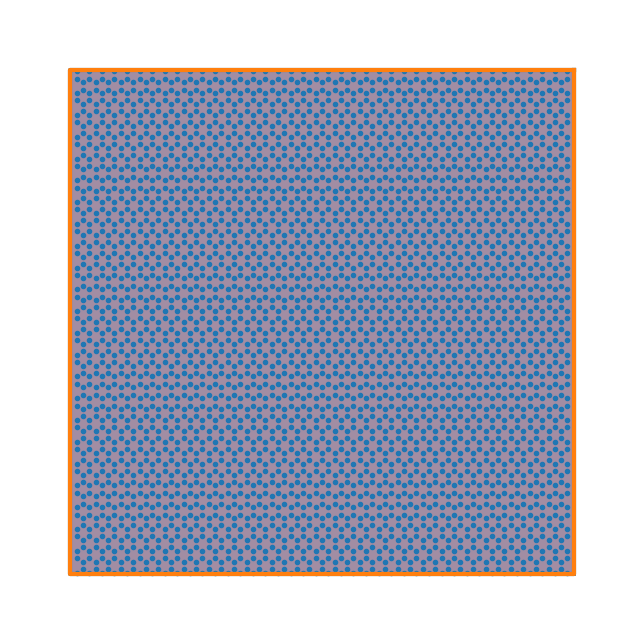

Cluster rectangle of size N=3626


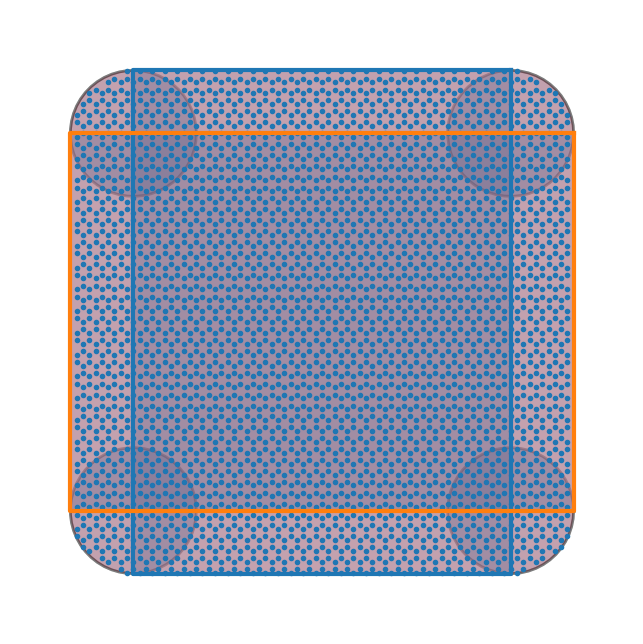

Cluster rectangle of size N=3486


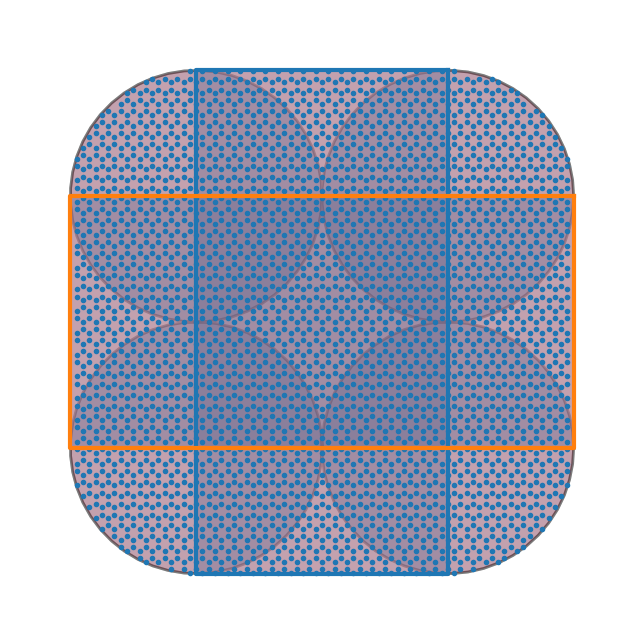

Cluster rectangle of size N=3239


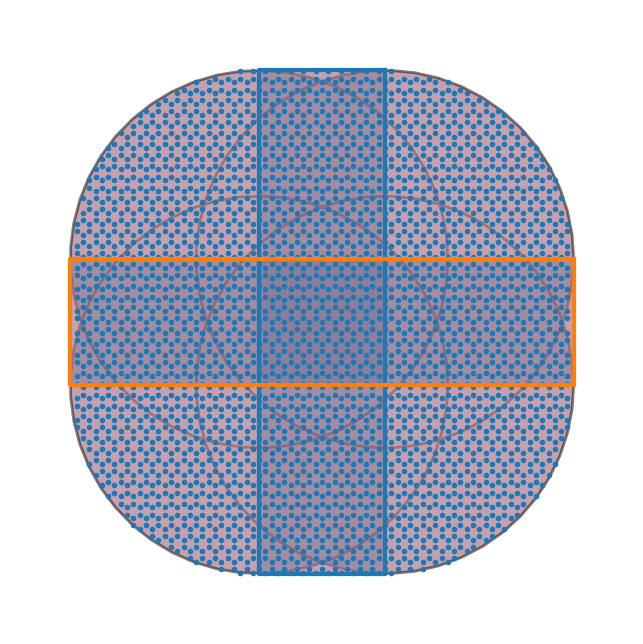

Cluster rectangle of size N=2882


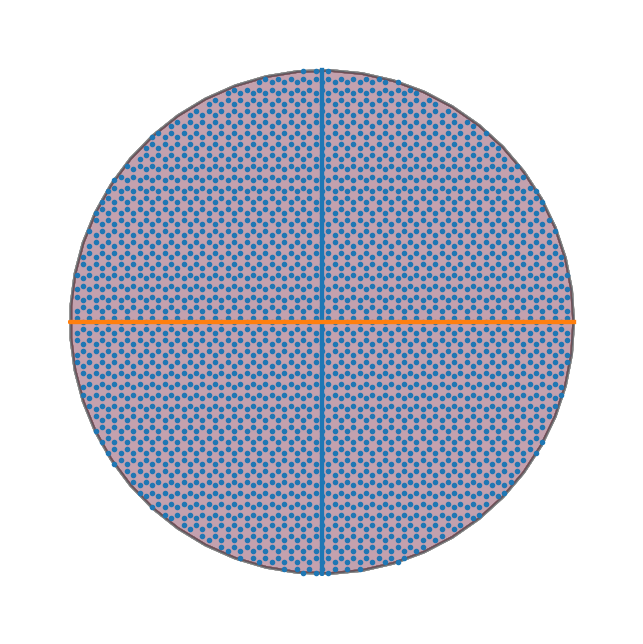

In [9]:
from shapely.geometry import MultiPolygon, Polygon
from descartes.patch import PolygonPatch

from tool_create_cluster import cluster_poly, get_poly, cluster_from_params
import misc

c = 0
a0, R = 20., 2
for R in np.linspace(0.01, a0, 5):
    params = {
    'a1': [1,0], 'a2': [-1/2, sqrt(3)/2],
    'cl_basis': [[0,0], [-0.5, 0.28867513]],
    'cl_poly': None,
    'cluster_shape': 'polygon',
    'direction': 0,
    'theta': 0, 'pos_cm': [0, 0] 
    }
    a = a0-R
    poly = []
    for i,j in [[1,1], [-1,1], [-1,-1], [1,-1]]:
        t = np.linspace(0,1)
        xc0, yc0 = (R)*np.cos(2*pi*t)+(i*a), (R)*np.sin(2*pi*t)+(j*a)
        poly.append(Polygon(np.stack((xc0,yc0), axis=1)))
    poly = MultiPolygon(poly)

    patch0 = PolygonPatch(poly, facecolor='tab:blue', alpha=0.3, zorder=0) # Add shaded area of polygon
    plt.gca().add_patch(patch0)
    
    aa = np.array([[1,1], [-1,1], [-1,-1], [1,-1], [1,1]])

    px1 = a*aa
    px1[:,1] += R*aa[:,1]
    px1poly = Polygon(px1)
    patch1 = PolygonPatch(px1poly, facecolor='tab:blue', alpha=0.3, zorder=0) # Add shaded area of polygon
    plt.gca().add_patch(patch1)

    px2 = a*aa
    px2[:,0] += R*aa[:,0]
    px2poly = Polygon(px2)
    patch2 = PolygonPatch(px2poly, facecolor='tab:blue', alpha=0.3, zorder=0) # Add shaded area of polygon
    plt.gca().add_patch(patch2)

    plt.plot(px1[:,0], px1[:,1])
    plt.plot(px2[:,0], px2[:,1])

    import shapely.ops
    ppoly = shapely.ops.unary_union([px1poly, px2poly, *poly])

    patch3 = PolygonPatch(ppoly, facecolor='tab:red', alpha=0.3, zorder=0) # Add shaded area of polygon
    plt.gca().add_patch(patch3)

    params['cl_poly'] = np.asarray(ppoly.exterior.coords)
    pos = cluster_from_params(params)
    N = pos.shape[0]
    print("Cluster %s of size N=%i" % (params['cluster_shape'], N))

    plt.scatter(pos[:,0], pos[:,1], s=1)
    
    plt.axis('off')

    plt.xlim([-1.2*a0,1.2*a0])
    plt.ylim([-1.2*a0,1.2*a0])
    plt.gca().set_aspect('equal')
    plt.gcf().set_dpi(200)
    plt.show()